<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

## **<center>K Nearest Neighbors Case Study</center>**

---
<a name = Section2></a>
# **2. Problem Statement**
---

- The study of the classification of types of glass was motivated by **criminological investigation**.

- It is an important task in **forensic** science to **analyze** the type of **glasses** found at the **crime scenes**

- This information can be used because **glass fragments** can **stick** to the **shoes** or **garments** of a **burglar** and can be used to **trace** them.

- A record of **glass type** and their **chemical composition** is made and stored for future use.

- The main ingredient of glass: $SiO_2$, other contents are also oxides, such as $Na_2O$, $CaO$, $K_2O$.

<center><img src="https://www.thepropertyfinders.com/wp-content/uploads/property-detective.jpg" width="500" height="300"></center>

### **Hypothetical Scenario**

- A **house break-in** **victim** informed the police that the intruder had entered by **shattering their window**.

- There are **several** types of **glass fragments** **found** at the crime scene and **5 suspects** have been **found** for investigation.

- You are tasked with designing a **classifier** that is trained on the previous records of various types of glasses.

- This classifier will then be used to **determine** the types of **glasses** found at the given **crime scene**.

- It will also be used to check the **glass** types found in the **suspects' garments** and **shoes**.

- The dataset has been categorized by **categories** of **glasses** and the **composition** of various **minerals** present in their **oxides**.

- The **Refractive Index** of each glass is also mentioned which will help the cops to **identify** the **actual intruders**.

<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
import time

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x : "%.5f" % x)

In [3]:
plt.style.use("classic")

---
<a name = Section4></a>
# **4. Data Acquisition and Description**
---

- Data set  has **9 key** properties where the first one is the **optical** property and the rest 8 are the **chemical oxide contents** of glass.
  
- So, the property 1 and property 2-9 have different dimensions.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 214 | 10 | 9.81 KB| 
<br>

|id| **Feature Name** | **Description** |
|:--|:--|:--|
|01| **RI** | Refractive index. |
|02| **Na** | Sodium (weight percent in corresponding oxide). |
|03| **Mg** | Magnesium (weight percent in corresponding oxide). |
|04| **Al** | Aluminum (weight percent in corresponding oxide). |
|05| **Si** | Silicon (weight percent in corresponding oxide). |
|06| **K** | Potassium (weight percent in corresponding oxide). |
|07| **Ca** | Calcium (weight percent in corresponding oxide). |
|08| **Ba** | Barium (weight percent in corresponding oxide). |
|09| **Fe** | Iron (weight percent in corresponding oxide). |
|10| **Type** | Type of glass (class attribute) |

In [4]:
glass = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/INSAID/main/glass.csv")
glass.shape

(214, 10)

In [5]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64000,4.49000,1.10000,71.78000,0.06000,8.75000,0.00000,0.00000,1
1,1.51761,13.89000,3.60000,1.36000,72.73000,0.48000,7.83000,0.00000,0.00000,1
2,1.51618,13.53000,3.55000,1.54000,72.99000,0.39000,7.78000,0.00000,0.00000,1
3,1.51766,13.21000,3.69000,1.29000,72.61000,0.57000,8.22000,0.00000,0.00000,1
4,1.51742,13.27000,3.62000,1.24000,73.08000,0.55000,8.07000,0.00000,0.00000,1


In [6]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [7]:
glass.Type.value_counts(normalize=True)*100

2   35.51402
1   32.71028
7   13.55140
3    7.94393
5    6.07477
6    4.20561
Name: Type, dtype: float64

In [8]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000
mean,1.51837,13.40785,2.68453,1.44491,72.65093,0.49706,8.95696,0.17505,0.05701,2.78037
std,0.00304,0.81660,1.44241,0.49927,0.77455,0.65219,1.42315,0.49722,0.09744,2.10374
min,1.51115,10.73000,0.00000,0.29000,69.81000,0.00000,5.43000,0.00000,0.00000,1.00000
25%,1.51652,12.90750,2.11500,1.19000,72.28000,0.12250,8.24000,0.00000,0.00000,1.00000
50%,1.51768,13.30000,3.48000,1.36000,72.79000,0.55500,8.60000,0.00000,0.00000,2.00000
75%,1.51916,13.82500,3.60000,1.63000,73.08750,0.61000,9.17250,0.00000,0.10000,3.00000
max,1.53393,17.38000,4.49000,3.50000,75.41000,6.21000,16.19000,3.15000,0.51000,7.00000


In [9]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [10]:
glass.isna().sum().sort_values(ascending=False)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
glass.duplicated().sum()

1

In [12]:
# Profile
import pandas_profiling as pp
profile = pp.ProfileReport(glass)
profile.to_file("output_before.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
glass.drop_duplicates(keep="first", inplace=True)

In [14]:
glass.shape

(213, 10)

In [15]:
glass.duplicated().sum()

0

In [16]:
glass.Type.value_counts(normalize=True)*100

2   35.68075
1   32.39437
7   13.61502
3    7.98122
5    6.10329
6    4.22535
Name: Type, dtype: float64

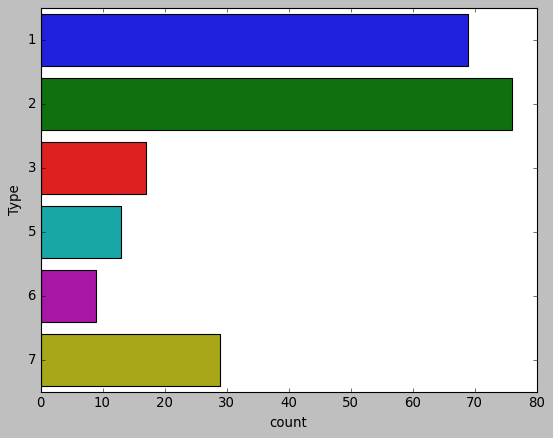

In [16]:
sns.countplot(y='Type', data=glass)
plt.show()

>Majority are Type 1 and 2.

>Type 4 is not there at all.

In [18]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [19]:
cols = glass.select_dtypes(include='float').columns.to_list()
cols

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

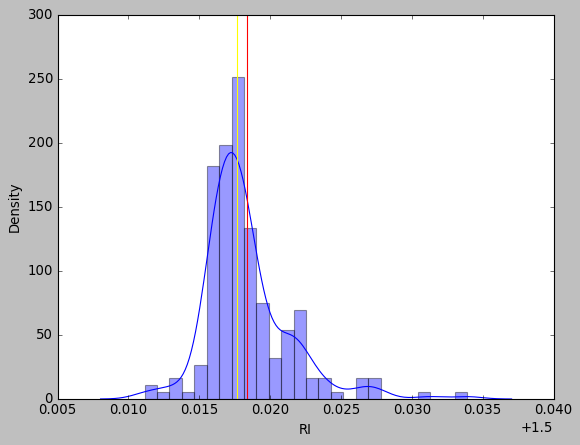

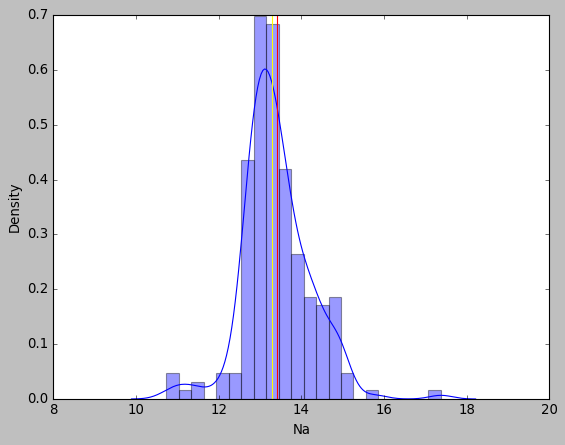

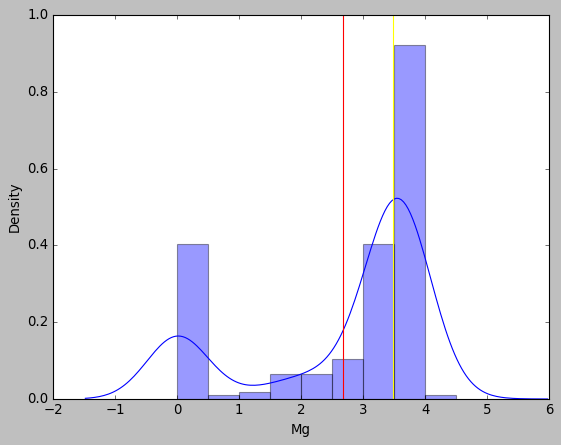

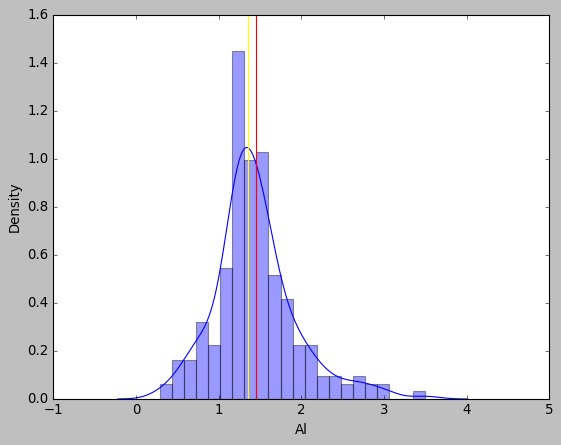

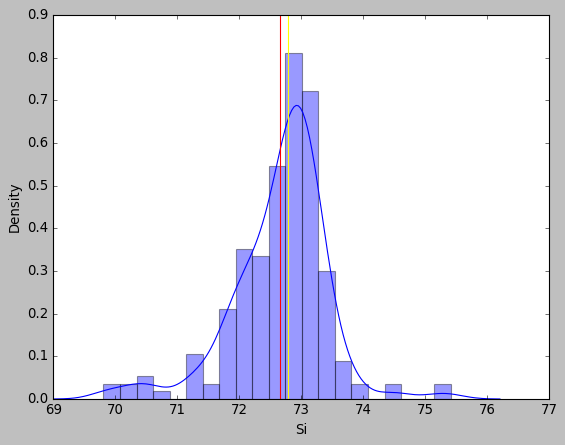

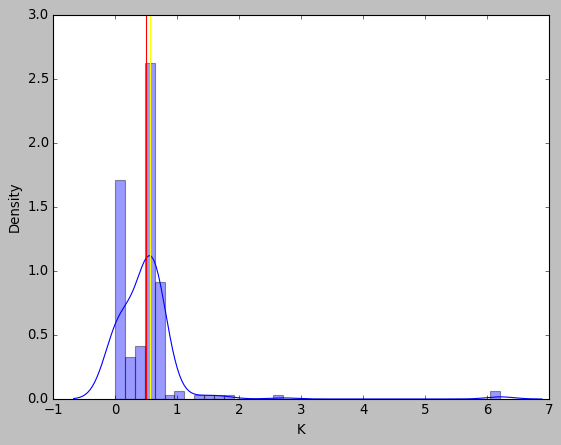

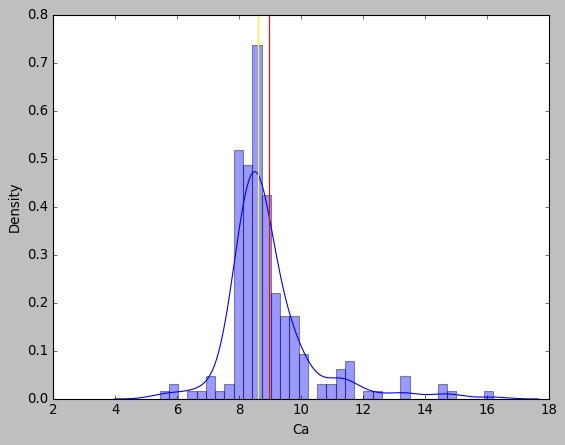

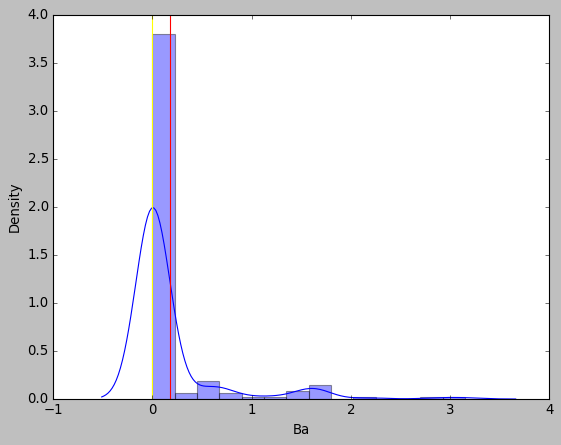

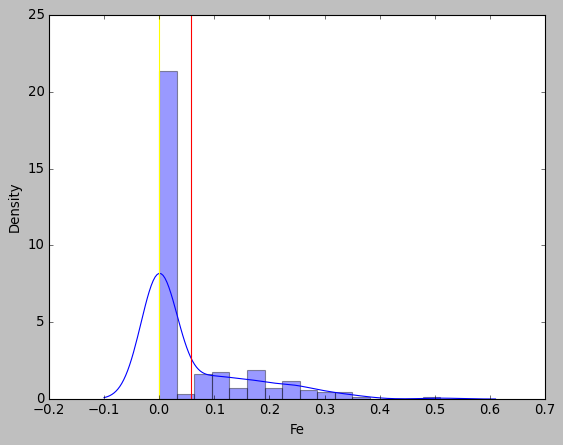

In [20]:
for c in cols:
    sns.distplot(glass[c])
    plt.axvline(glass[c].mean(), color='red')
    plt.axvline(glass[c].median(), color='yellow')
    print("="*60)
    plt.show()

In [21]:
for c in cols:
    print("Skewness in",c,"is:",glass[c].skew())
    print("="*40)

Skewness in RI is: 1.6480173737729908
Skewness in Na is: 0.46569850922621137
Skewness in Mg is: -1.1460958436967303
Skewness in Al is: 0.9384017147473468
Skewness in Si is: -0.7446460155618705
Skewness in K is: 6.545428649493799
Skewness in Ca is: 2.050752066632569
Skewness in Ba is: 3.406748836984873
Skewness in Fe is: 1.747173207250088


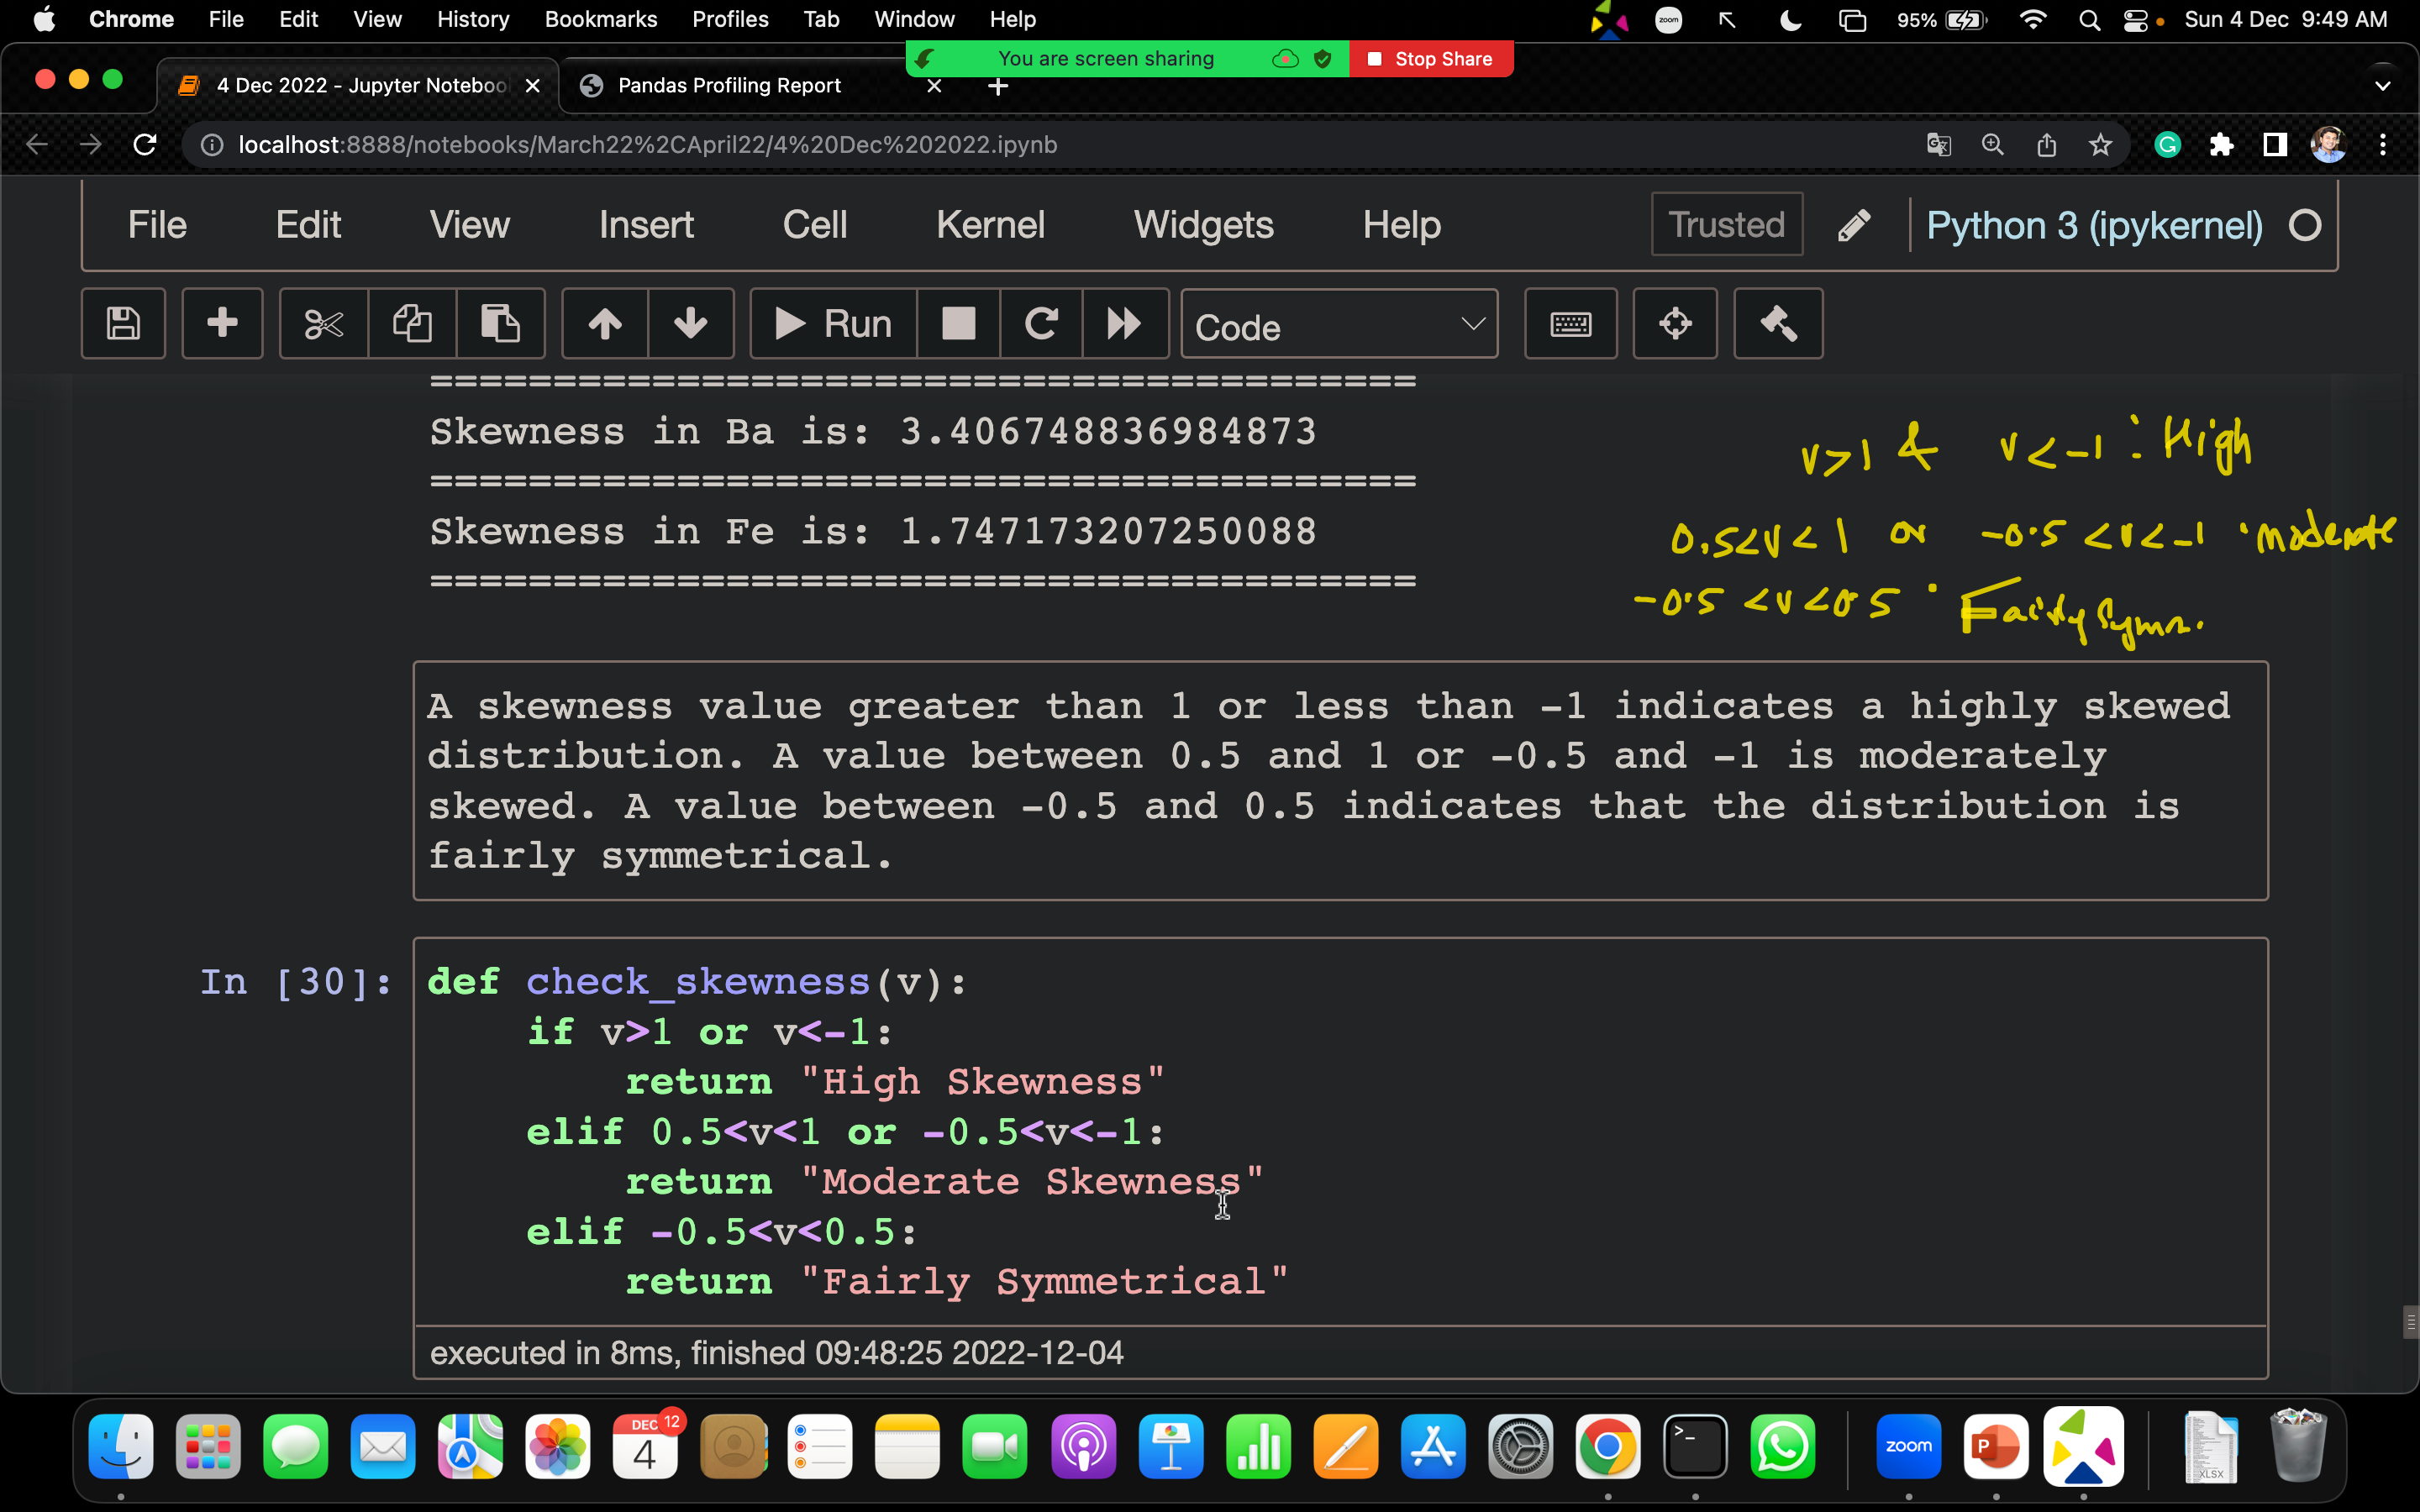

In [22]:
def check_skewness(v):
    if v>1 or v<-1:
        return "High Skewness"
    elif 0.5<v<1 or -1<v<-0.5:
        return "Moderate Skewness"
    elif -0.5<=v<=0.5:
        return "Fairly Symmetrical"

In [23]:
for c in cols:
    skewness = check_skewness(glass[c].skew())
    print("Skewness in",c,"is:",skewness)
    print("="*40)

Skewness in RI is: High Skewness
Skewness in Na is: Fairly Symmetrical
Skewness in Mg is: High Skewness
Skewness in Al is: Moderate Skewness
Skewness in Si is: Moderate Skewness
Skewness in K is: High Skewness
Skewness in Ca is: High Skewness
Skewness in Ba is: High Skewness
Skewness in Fe is: High Skewness


In [24]:
glass.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64000,4.49000,1.10000,71.78000,0.06000,8.75000,0.00000,0.00000,1
1,1.51761,13.89000,3.60000,1.36000,72.73000,0.48000,7.83000,0.00000,0.00000,1


In [25]:
X = glass.loc[:,glass.columns != 'Type']
y = glass.Type

In [26]:
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64000,4.49000,1.10000,71.78000,0.06000,8.75000,0.00000,0.00000
1,1.51761,13.89000,3.60000,1.36000,72.73000,0.48000,7.83000,0.00000,0.00000


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149, 9), (64, 9), (149,), (64,))

In [30]:
cols = glass.columns.to_list()[0:-1]
cols

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train[cols] = ss.fit_transform(X_train[cols])
X_test[cols] = ss.transform(X_test[cols])

In [32]:
for c in cols:
    skewness = check_skewness(X_train[c].skew())
    print("Skewness in",c,"is:",skewness)
    print("="*40)

Skewness in RI is: High Skewness
Skewness in Na is: Moderate Skewness
Skewness in Mg is: High Skewness
Skewness in Al is: Moderate Skewness
Skewness in Si is: Moderate Skewness
Skewness in K is: Fairly Symmetrical
Skewness in Ca is: High Skewness
Skewness in Ba is: High Skewness
Skewness in Fe is: High Skewness


## Take Home Task

Try applying various scaling techniques on this along with different TTS ratios and figure out the one which results in least skewness.

# Happy Learning